In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from pybind_util import Util

util = Util()

In [ ]:
i = 0
lq = loadmat(f"test/test_{i}.mat")['data']
hq = loadmat(f"test/test_sr{i}.mat")['data']

In [ ]:
lq = lq / lq.max()
hq = hq / hq.max()

In [ ]:
plt.figure(dpi=400)
plt.subplot(121), plt.imshow(lq, 'gray'), plt.axis('off'), plt.title('lq')
plt.subplot(122), plt.imshow(hq, 'gray'), plt.axis('off'), plt.title('hq')

In [ ]:
plt.imshow(hq[:500, :500])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import python.utils.utils_image as util_img

from scipy.io import loadmat

In [2]:
ori = util_img.gdal_read("/data/dataset/project/1-MUL.TIF")
ori = np.transpose(ori, (1, 2, 0))
transer = loadmat("test/save.mat")['data']

In [3]:
ori = ori / ori.max()
transer = transer / transer.max()

(<Axes: >,
 (-0.5, 2104.5, 2104.5, -0.5))

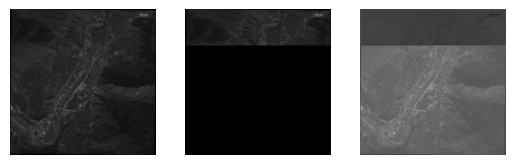

In [6]:
c = 2
plt.subplot(131), plt.imshow(ori[:, :, c], 'gray'), plt.axis('off')
plt.subplot(132), plt.imshow(transer[:, :, c], 'gray'), plt.axis('off')
plt.subplot(133), plt.imshow(ori[:, :, c] - transer[:, :, c], 'gray'), plt.axis('off')